In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import itertools

# Explore hate crime data from Kaggle

In [2]:
kaggle_hate_crimes = pd.read_csv('hate_crimes.csv')

In [3]:
kaggle_hate_crimes.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [4]:
print(kaggle_hate_crimes.dtypes)

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
dtype: object


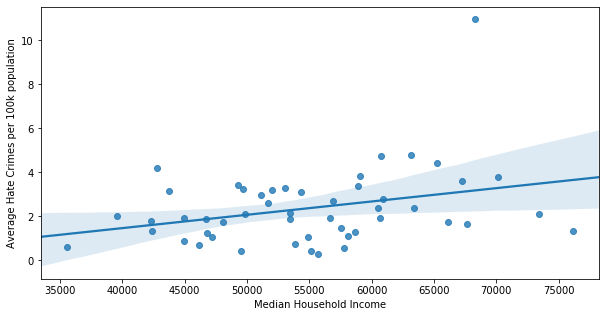

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
sns.regplot(x = kaggle_hate_crimes['median_household_income'], y = kaggle_hate_crimes['avg_hatecrimes_per_100k_fbi'])
plt.xlabel('Median Household Income')
plt.ylabel('Average Hate Crimes per 100k population')
ax.get_xaxis().get_major_formatter().set_scientific(False)

plt.show()

In [16]:
kaggle_hate_crimes_pearson = kaggle_hate_crimes.corr(method='pearson')
kaggle_hate_crimes_pearson

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
median_household_income,1.000000,-0.376722,0.286480,0.653490,0.302288,-0.818045,-0.178821,0.103775,-0.597528,0.350714,0.318246
share_unemployed_seasonal,-0.376722,1.000000,0.358113,-0.621168,0.278899,0.209440,0.541659,0.431847,-0.148192,0.083292,0.073936
share_population_in_metro_areas,0.286480,0.358113,1.000000,-0.268846,0.745464,-0.385559,0.515843,0.547672,-0.570695,0.162217,0.209827
share_population_with_high_school_degree,0.653490,-0.621168,-0.268846,1.000000,-0.277009,-0.494008,-0.592052,-0.434846,-0.155656,0.308944,0.164148
share_non_citizen,0.302288,0.278899,0.745464,-0.277009,1.000000,-0.389718,0.480257,0.733655,-0.631194,0.243507,0.300892
share_white_poverty,-0.818045,0.209440,-0.385559,-0.494008,-0.389718,1.000000,0.032584,-0.269449,0.552849,-0.286170,-0.260094
gini_index,-0.178821,0.541659,0.515843,-0.592052,0.480257,0.032584,1.000000,0.468467,-0.411543,0.329439,0.421272
share_non_white,0.103775,0.431847,0.547672,-0.434846,0.733655,-0.269449,0.468467,1.000000,-0.488838,0.047561,0.083525
share_voters_voted_trump,-0.597528,-0.148192,-0.570695,-0.155656,-0.631194,0.552849,-0.411543,-0.488838,1.000000,-0.657067,-0.504532
hate_crimes_per_100k_splc,0.350714,0.083292,0.162217,0.308944,0.243507,-0.286170,0.329439,0.047561,-0.657067,1.000000,0.758700


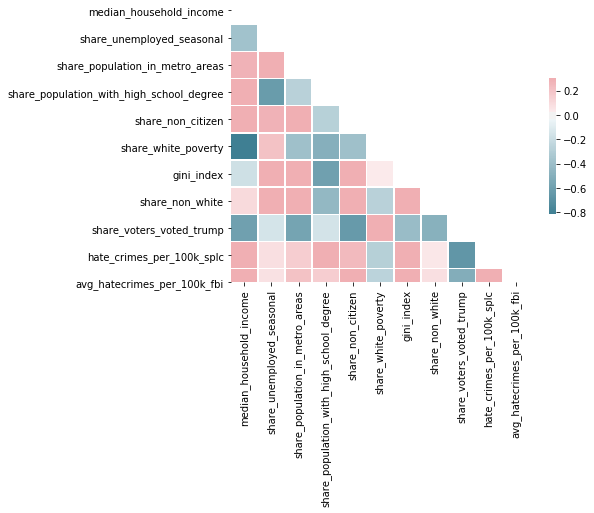

In [15]:
#this masks the upper triangle of the heatmap
mask = np.zeros_like(kaggle_hate_crimes_pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#this sets up the figure
f, ax = plt.subplots(figsize=(7, 5))

#this is a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(hate_crimes_pearson, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Gini Coefficient Data

In [50]:
gini_2013 = pd.read_csv('gini_2013.csv')
gini_2014 = pd.read_csv('gini_2014.csv')
gini_2015 = pd.read_csv('gini_2015.csv')
gini_2016 = pd.read_csv('gini_2016.csv')
gini_2017 = pd.read_csv('gini_2017.csv')

In [65]:
gini_2013

,GEO.display-label,HD01_VD01
0,Geography,Estimate; Gini Index
1,Alabama,0.4729
2,Alaska,0.4143
3,Arizona,0.4585
4,Arkansas,0.4646
5,California,0.4782
6,Colorado,0.4568
7,Connecticut,0.4874
8,Delaware,0.4410
9,District of Columbia,0.5303


In [64]:
gini_2013.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

KeyError: "['GEO.id' 'GEO.id2' 'HD02_VD01'] not found in axis"

In [68]:
gini_2014.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

KeyError: "['GEO.id' 'GEO.id2' 'HD02_VD01'] not found in axis"

In [70]:
gini_2015.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [71]:
gini_2016.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [72]:
gini_2017.drop(['GEO.id', 'GEO.id2', 'HD02_VD01'], axis = 1, inplace=True)

In [73]:
gini_2013_clean = gini_2013.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2014_clean = gini_2014.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2015_clean = gini_2014.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2016_clean = gini_2014.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})
gini_2017_clean = gini_2014.rename(columns={"GEO.display-label": "State", "HD01_VD01": "Gini_Index_Est"})

In [78]:
gini_2017_clean

,State,Gini_Index_Est
0,Geography,Estimate; Gini Index
1,Alabama,0.4740
2,Alaska,0.4146
3,Arizona,0.4614
4,Arkansas,0.4661
5,California,0.4823
6,Colorado,0.4584
7,Connecticut,0.4919
8,Delaware,0.4433
9,District of Columbia,0.5295


In [98]:
gini_2013_reindex = gini_2013_clean.drop([0,52])

In [99]:
gini_2013_reindex.reset_index(drop=True)

,State,Gini_Index_Est
0,Alabama,0.4729
1,Alaska,0.4143
2,Arizona,0.4585
3,Arkansas,0.4646
4,California,0.4782
5,Colorado,0.4568
6,Connecticut,0.4874
7,Delaware,0.4410
8,District of Columbia,0.5303
9,Florida,0.4782


In [91]:
gini_2013_reindex

,State,Gini_Index_Est
1,Alabama,0.4729
2,Alaska,0.4143
3,Arizona,0.4585
4,Arkansas,0.4646
5,California,0.4782
6,Colorado,0.4568
7,Connecticut,0.4874
8,Delaware,0.4410
9,District of Columbia,0.5303
10,Florida,0.4782


In [95]:
gini_2014_reindex = gini_2014_clean.drop([0,52])

In [100]:
gini_2014_reindex = gini_2014_reindex.reset_index(drop=True)

In [101]:
gini_2014_reindex

,State,Gini_Index_Est
0,Alabama,0.4740
1,Alaska,0.4146
2,Arizona,0.4614
3,Arkansas,0.4661
4,California,0.4823
5,Colorado,0.4584
6,Connecticut,0.4919
7,Delaware,0.4433
8,District of Columbia,0.5295
9,Florida,0.4812


In [102]:
gini_2015_reindex = gini_2015_clean.drop([0,52])

In [103]:
gini_2015_reindex = gini_2015_reindex.reset_index(drop=True)

In [104]:
gini_2015_reindex

,State,Gini_Index_Est
0,Alabama,0.4740
1,Alaska,0.4146
2,Arizona,0.4614
3,Arkansas,0.4661
4,California,0.4823
5,Colorado,0.4584
6,Connecticut,0.4919
7,Delaware,0.4433
8,District of Columbia,0.5295
9,Florida,0.4812


In [109]:
gini_2016_reindex = gini_2016_clean.drop([0,52])

In [110]:
gini_2016_reindex = gini_2016_reindex.reset_index(drop=True)

In [111]:
gini_2016_reindex

,State,Gini_Index_Est
0,Alabama,0.4740
1,Alaska,0.4146
2,Arizona,0.4614
3,Arkansas,0.4661
4,California,0.4823
5,Colorado,0.4584
6,Connecticut,0.4919
7,Delaware,0.4433
8,District of Columbia,0.5295
9,Florida,0.4812


In [112]:
gini_2017_reindex = gini_2017_clean.drop([0,52])

In [113]:
gini_2017_reindex = gini_2017_reindex.reset_index(drop=True)

In [114]:
gini_2017_reindex

,State,Gini_Index_Est
0,Alabama,0.4740
1,Alaska,0.4146
2,Arizona,0.4614
3,Arkansas,0.4661
4,California,0.4823
5,Colorado,0.4584
6,Connecticut,0.4919
7,Delaware,0.4433
8,District of Columbia,0.5295
9,Florida,0.4812


In [118]:
left = gini_2013_reindex
right = gini_2014_reindex
df_merge1 = left.merge(right, on=('State'), suffixes=('_2013', '_2014'))

In [142]:
left = df_merge1
right = gini_2015_reindex
# df_merge2 = left.set_index('State').join(right.set_index('State'))
df_merge2 = left.join(right, rsuffix='_2015')

In [148]:
df_merge2 = df_merge2.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2015'})

In [149]:
left = df_merge2
right = gini_2016_reindex
df_merge3 = left.join(right, rsuffix='_2016')

In [150]:
df_merge3 = df_merge3.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2016'})

In [152]:
left = df_merge3
right = gini_2017_reindex
df_merge4 = left.join(right, rsuffix='_2017')

In [153]:
df_merge4 = df_merge4.rename(columns = {'Gini_Index_Est': 'Gini_Index_Est_2017'})

In [154]:
df_merge4

,State,Gini_Index_Est_2013,Gini_Index_Est_2014,State_2015,Gini_Index_Est_2015,State_2016,Gini_Index_Est_2016,State_2017,Gini_Index_Est_2017
0,Alabama,0.4729,0.4740,Alabama,0.4740,Alabama,0.4740,Alabama,0.4740
1,Alaska,0.4143,0.4146,Alaska,0.4146,Alaska,0.4146,Alaska,0.4146
2,Arizona,0.4585,0.4614,Arizona,0.4614,Arizona,0.4614,Arizona,0.4614
3,Arkansas,0.4646,0.4661,Arkansas,0.4661,Arkansas,0.4661,Arkansas,0.4661
4,California,0.4782,0.4823,California,0.4823,California,0.4823,California,0.4823
5,Colorado,0.4568,0.4584,Colorado,0.4584,Colorado,0.4584,Colorado,0.4584
6,Connecticut,0.4874,0.4919,Connecticut,0.4919,Connecticut,0.4919,Connecticut,0.4919
7,Delaware,0.4410,0.4433,Delaware,0.4433,Delaware,0.4433,Delaware,0.4433
8,District of Columbia,0.5303,0.5295,District of Columbia,0.5295,District of Columbia,0.5295,District of Columbia,0.5295
9,Florida,0.4782,0.4812,Florida,0.4812,Florida,0.4812,Florida,0.4812


In [158]:
gini_by_state = df_merge4.drop(['State_2015', 'State_2016', 'State_2017'], axis=1)

In [160]:
gini_by_state.to_csv('gini_by_state.csv')